In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
import os, zipfile
import splitfolders

In [11]:
!pip install split-folders --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


# Data Preprocessing (Split data)

In [147]:

splitfolders.ratio('E:/Learn/Image Recognition/rice_leaf_diseases2', output="E:/Learn/RICE LEAF DATASET/output5(HD)", seed=1337, ratio=(.75,.25)) 

Copying files: 240 files [00:00, 597.76 files/s]


# Deklarsi direktori data

In [45]:
train_dir = 'E:/Learn/RICE LEAF DATASET/output4(5banding5)/train' 
test_dir = 'E:/Learn/RICE LEAF DATASET/output4(5banding5)/val'
os.listdir(train_dir)

['Sehat', 'Tidak Sehat']

# Data generator

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./250,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    zoom_range=.1)
test_datagen = ImageDataGenerator(
    rescale=1./250,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    zoom_range=.1)

# Penentuan parameter batch dan kelas

In [47]:
# direktori data latih
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=100, class_mode='categorical', shuffle=True) #'categorical'
# direktori data validasi
validation_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=100, class_mode='categorical', shuffle=True) #shuffle=True

Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


# Arsitektur AlexNET

In [200]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=11, strides=4, activation = 'relu', padding='same', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) #'softmax'

# Arsitektur VGG

In [67]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Compile model

In [68]:
#import keras
#opt = keras.optimizers.Adam(learning_rate=0.01) binary_crossentropy &categoricalcross and sparse categorical
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
               metrics=['accuracy'])
size_train = train_generator.n//train_generator.batch_size
size_validation = validation_generator.n//validation_generator.batch_size
print(size_train)
print(size_validation)

80
80


# Training model

In [72]:
checkpoint_filepath = 'E:/Learn/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
history = model.fit(
    train_generator,
    steps_per_epoch=4,  # berapa batch yang akan dieksekusi per epoch
    epochs=100,
    validation_data= validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=4,  # batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[model_checkpoint_callback])


Epoch 1/100
4/4 - 102s - loss: 0.5751 - accuracy: 0.7600 - val_loss: 0.7220 - val_accuracy: 0.4100
Epoch 2/100
4/4 - 78s - loss: 0.5715 - accuracy: 0.7150 - val_loss: 0.5634 - val_accuracy: 0.7575
Epoch 3/100
4/4 - 90s - loss: 0.7418 - accuracy: 0.7625 - val_loss: 0.5868 - val_accuracy: 0.8725
Epoch 4/100
4/4 - 81s - loss: 0.5641 - accuracy: 0.7900 - val_loss: 0.5396 - val_accuracy: 0.7800
Epoch 5/100
4/4 - 91s - loss: 0.6309 - accuracy: 0.6300 - val_loss: 0.5732 - val_accuracy: 0.7350
Epoch 6/100
4/4 - 74s - loss: 0.5471 - accuracy: 0.7600 - val_loss: 0.5375 - val_accuracy: 0.7475
Epoch 7/100
4/4 - 82s - loss: 0.5538 - accuracy: 0.7775 - val_loss: 0.4286 - val_accuracy: 0.7625
Epoch 8/100
4/4 - 79s - loss: 0.5596 - accuracy: 0.7800 - val_loss: 0.5127 - val_accuracy: 0.7300
Epoch 9/100
4/4 - 82s - loss: 0.6158 - accuracy: 0.6325 - val_loss: 0.5033 - val_accuracy: 0.7775
Epoch 10/100
4/4 - 81s - loss: 0.5001 - accuracy: 0.7625 - val_loss: 0.4839 - val_accuracy: 0.7300
Epoch 11/100
4/4 -

4/4 - 67s - loss: 0.0246 - accuracy: 0.9900 - val_loss: 0.0942 - val_accuracy: 0.9625
Epoch 48/100
4/4 - 82s - loss: 0.1088 - accuracy: 0.9600 - val_loss: 0.0924 - val_accuracy: 0.9925
Epoch 49/100
4/4 - 63s - loss: 0.0899 - accuracy: 0.9925 - val_loss: 0.1391 - val_accuracy: 0.9875
Epoch 50/100
4/4 - 67s - loss: 0.0871 - accuracy: 0.9750 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 51/100
4/4 - 70s - loss: 0.1133 - accuracy: 0.9675 - val_loss: 0.0919 - val_accuracy: 0.9850
Epoch 52/100
4/4 - 64s - loss: 0.0757 - accuracy: 0.9925 - val_loss: 0.1163 - val_accuracy: 0.9900
Epoch 53/100
4/4 - 64s - loss: 0.0618 - accuracy: 0.9925 - val_loss: 0.0417 - val_accuracy: 0.9900
Epoch 54/100
4/4 - 72s - loss: 0.2154 - accuracy: 0.9750 - val_loss: 0.0225 - val_accuracy: 0.9925
Epoch 55/100
4/4 - 71s - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.1226 - val_accuracy: 0.9775
Epoch 56/100
4/4 - 68s - loss: 0.1129 - accuracy: 0.9900 - val_loss: 0.1005 - val_accuracy: 0.9950
Epoch 57/100
4/4 - 71s 

Epoch 94/100
4/4 - 65s - loss: 0.0252 - accuracy: 0.9975 - val_loss: 0.0295 - val_accuracy: 0.9850
Epoch 95/100
4/4 - 70s - loss: 0.0416 - accuracy: 0.9775 - val_loss: 0.0072 - val_accuracy: 0.9975
Epoch 96/100
4/4 - 63s - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0770 - val_accuracy: 0.9750
Epoch 97/100
4/4 - 62s - loss: 0.0959 - accuracy: 0.9725 - val_loss: 0.0298 - val_accuracy: 0.9975
Epoch 98/100
4/4 - 67s - loss: 0.0382 - accuracy: 0.9925 - val_loss: 0.0447 - val_accuracy: 0.9950
Epoch 99/100
4/4 - 63s - loss: 0.0232 - accuracy: 0.9975 - val_loss: 0.0117 - val_accuracy: 0.9975
Epoch 100/100
4/4 - 61s - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0134 - val_accuracy: 0.9950


# Plot proses training (akurasi dan ralat)

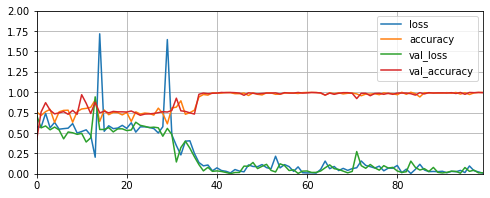

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 3))

plt.grid(True)
plt.gca().set_ylim(0, 2) 
plt.show()

# Uji Coba Model

[[0. 1.]]
Sehat :  0.0 %
Tidak sehat :  100.0 %
Tanaman tidak sehat


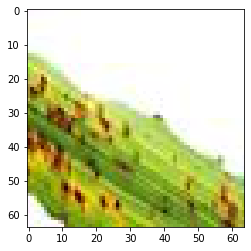

In [81]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
%matplotlib inline
prediksi = tf.keras.models.load_model('E:/Learn/model2(vgg).h5')
#uploaded = files.upload()
#file = 'infeksi bakteri.jpg'
#file = 'healthy leaf.png'
file = 'Brown_spot.jpg' 
#file = 'Leaf_smut.JPG'
#file = 'healthy leaf 3.jpg'
#file = 'healthy leaf 2.1.jpg'
for fn in file:
 
  # predicting images
  path = fn
  img = image.load_img(file, target_size=(64,64))
  #imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = prediksi.predict(images, batch_size=5)
gambar = image.load_img(file)
plt.imshow(gambar)
print(classes)
print('Sehat : ', classes[0,0]*100, '%')
print('Tidak sehat : ', classes[0,1]*100, '%')
#print("Sehat : ", classes[0,2]*100, '%')
#print("Becak daun : ", classes[0,3]*100, '%')
if classes[0, 0] == np.max(classes):
  print('Tanaman sehat')
#elif classes[0, 1] == np.max(classes) and classes[0, 1]:
 # print('Tanaman sehat')
elif classes[0, 1] == np.max(classes):
  print('Tanaman tidak sehat')
#elif classes[0, 2] == np.max(classes):
 # print("Sehat")
#elif classes[0, 3] == np.max(classes):
 # print("Bercak daun")

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 256)      

In [74]:
model.save('E:/Learn/model2(vgg).h5')

In [44]:
# from keras.utils import plot_model
# from keras.utils.vis_utils import plot_model
# import graphviz
# import keras
# import pydot
# import os
# import pydotplus
# from keras.utils.vis_utils import model_to_dot
# keras.utils.vis_utils.pydot = pydot
# os.environ["PATH"] += os.pathsep + 'C:/anaconda3/Lib/site-packages/graphviz-2.38/bin'
# plot_model('E:/Learn/model1.h5', to_file='E:/Learn/vismodel1.png', show_shapes=True, show_layer_names=True)